# try 应该用validation的gt和预测值！


In [2]:
from argoverse.visualization.visualize_sequences import viz_sequence
import matplotlib as plt
import numpy as np
from argoverse.map_representation.map_api import ArgoverseMap
from collections import OrderedDict
from typing import Dict,List,Union
import pandas as pd
from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader

In [5]:
## set root_dir to the correct path to your dataset folder
root_dir='/mnt/home/husiyuan/code/argo_my/ARGO1/data/test_obs/data'

# root_dir='/mnt/home/husiyuan/code/argo_my/ARGO1/data/test_obs/processed'
afl = ArgoverseForecastingLoader(root_dir)
print('Total number of sequences:',len(afl))

Total number of sequences: 78143


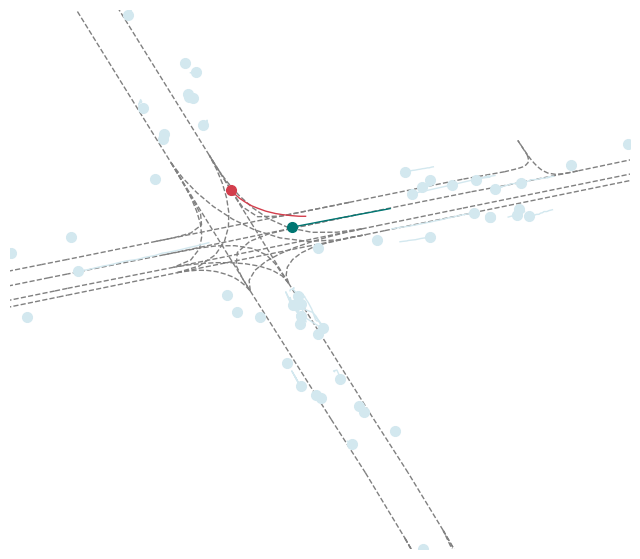

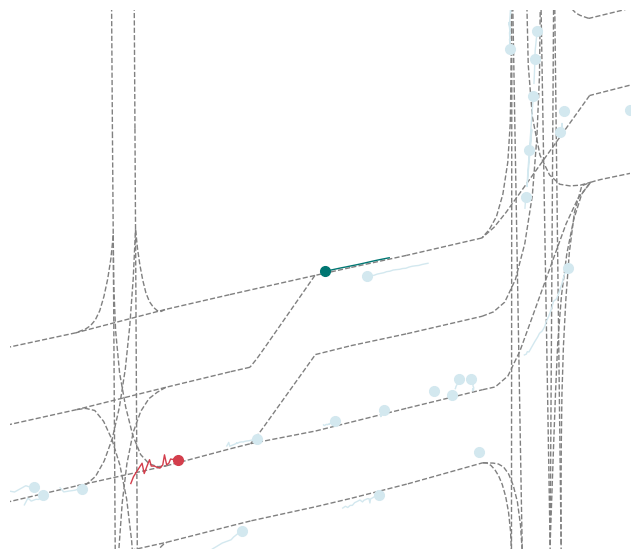

In [6]:
seq_path = f"{root_dir}/2645.csv"
viz_sequence(afl.get(seq_path).seq_df, show=True)
seq_path = f"{root_dir}/3828.csv"
viz_sequence(afl.get(seq_path).seq_df, show=True)


/mnt/home/husiyuan/miniconda3/envs/hivt/lib/python3.8/site-packages/shapely/linear.py:90: RuntimeWarning: invalid value encountered in line_locate_point
  return lib.line_locate_point(line, other)


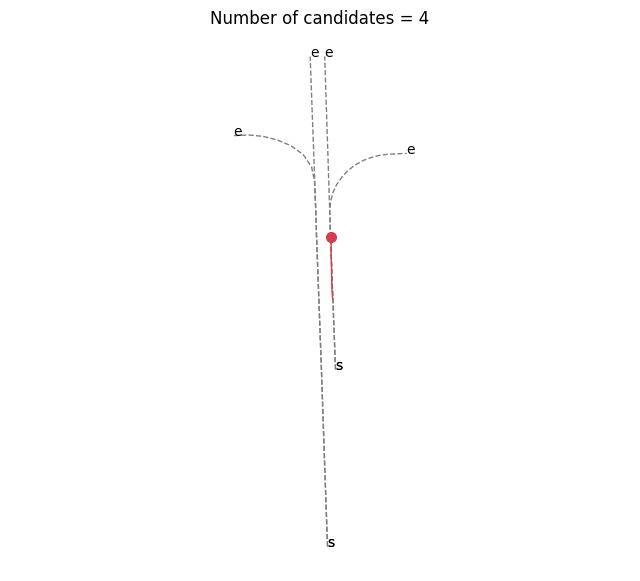

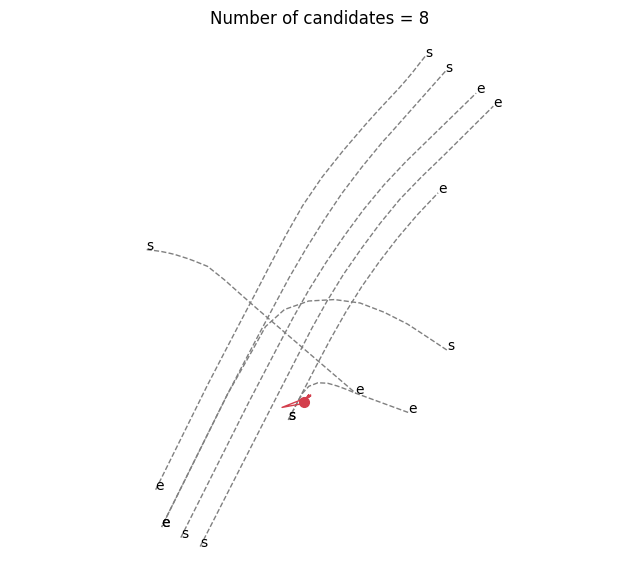

In [7]:
from argoverse.map_representation.map_api import ArgoverseMap

avm = ArgoverseMap()

obs_len = 20

index = 2
seq_path = afl.seq_list[index]
agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, afl[index].city, viz=True)

index = 3
seq_path = afl.seq_list[index]
agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, afl[index].city, viz=True)

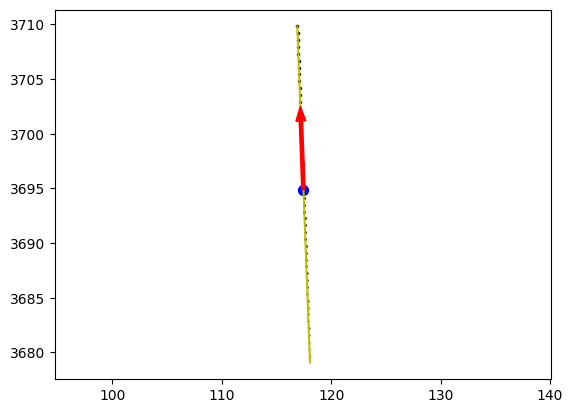

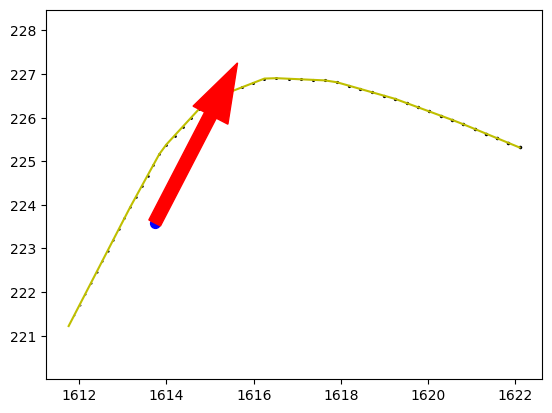

In [8]:
index = 2
seq_path = afl.seq_list[index]
agent_traj = afl.get(seq_path).agent_traj
lane_direction = avm.get_lane_direction(agent_traj[0], afl[index].city, visualize=True)

index = 3
seq_path = afl.seq_list[index]
agent_traj = afl.get(seq_path).agent_traj
lane_direction = avm.get_lane_direction(agent_traj[0], afl[index].city, visualize=True)

# 周子康给的 HiVT在issue回答的

In [ ]:
def plot_single_vehicle(
    avm: ArgoverseMap, 
    sample_past_trajectory: np.ndarray,  # (20, 2)
    sample_groundtruth: np.ndarray,  # (20, 2) 
    sample_forecasted_trajectories: List[np.ndarray],  # List[(30, 2)]
    sample_city_name: str, 
    ls: str):

    sample_groundtruth = np.concatenate((np.expand_dims(sample_past_trajectory[-1], axis=0), sample_groundtruth), axis=0)
    for sample_forecasted_trajectory in sample_forecasted_trajectories:
        sample_forecasted_trajectory = np.concatenate((np.expand_dims(sample_past_trajectory[-1], axis=0), sample_forecasted_trajectory), axis=0)

    ## Plot history
    obs_len = sample_past_trajectory.shape[0]
    pred_len = sample_groundtruth.shape[0]
    plt.plot(
        sample_past_trajectory[:, 0],
        sample_past_trajectory[:, 1],
        color="#ECA154",
        label="Past Trajectory",
        alpha=1,
        linewidth=3,
        zorder=15,
        ls = ls
    )

    ## Plot future
    plt.plot(
        sample_groundtruth[:, 0],
        sample_groundtruth[:, 1],
        color="#d33e4c",
        label="Ground Truth",
        alpha=1,
        linewidth=3.0,
        zorder=20,
        ls = "--"
    )

    ## Plot prediction
    for j in range(len(sample_forecasted_trajectories)):
        plt.plot(
            sample_forecasted_trajectories[j][:, 0],
            sample_forecasted_trajectories[j][:, 1],
            color="#007672",
            label="Forecasted Trajectory",
            alpha=1,
            linewidth=3.2,
            zorder=15,
            ls = "--"
        )
        
        # Plot the end marker for forcasted trajectories
        plt.arrow(
            sample_forecasted_trajectories[j][-2, 0], 
            sample_forecasted_trajectories[j][-2, 1],
            sample_forecasted_trajectories[j][-1, 0] - sample_forecasted_trajectories[j][-2, 0],
            sample_forecasted_trajectories[j][-1, 1] - sample_forecasted_trajectories[j][-2, 1],
            color="#007672",
            label="Forecasted Trajectory",
            alpha=1,
            linewidth=3.2,
            zorder=15,
            head_width=1.1,
        )
    
    ## Plot the end marker for history
    plt.arrow(
            sample_past_trajectory[-2, 0], 
            sample_past_trajectory[-2, 1],
            sample_past_trajectory[-1, 0] - sample_past_trajectory[-2, 0],
            sample_past_trajectory[-1, 1] - sample_past_trajectory[-2, 1],
            color="#ECA154",
            label="Past Trajectory",
            alpha=1,
            linewidth=3,
            zorder=25,
            head_width=1.0,
        )

    ## Plot the end marker for future
    plt.arrow(
            sample_groundtruth[-2, 0], 
            sample_groundtruth[-2, 1],
            sample_groundtruth[-1, 0] - sample_groundtruth[-2, 0],
            sample_groundtruth[-1, 1] - sample_groundtruth[-2, 1],
            color="#d33e4c",
            label="Ground Truth",
            alpha=1,
            linewidth=3.0,
            zorder=25,
            head_width=1.0,
        )

    ## Plot history context
    for j in range(obs_len):
        lane_ids = avm.get_lane_ids_in_xy_bbox(
            sample_past_trajectory[j, 0],
            sample_past_trajectory[j, 1],
            sample_city_name,
            query_search_range_manhattan=65,
        )
        [avm.draw_lane(lane_id, sample_city_name) for lane_id in lane_ids]

    ## Plot future context
    for j in range(pred_len):
        lane_ids = avm.get_lane_ids_in_xy_bbox(
            sample_groundtruth[j, 0],
            sample_groundtruth[j, 1],
            sample_city_name,
            query_search_range_manhattan=65,
        )
        [avm.draw_lane(lane_id, sample_city_name) for lane_id in lane_ids]

# 2023.7.19

3